# Определение выгодного тарифа для телеком компании.



## Описание проекта


Проведен предварительный анализ использования тарифов на выборке клиентов, проанализировано поведение клиентов при использовании услуг оператора и рекомендованы оптимальные наборы услуг для пользователей. Проведена предобработка данных, их анализ. Проверены гипотезы о различии выручки абонентов разных тарифов и различии выручки абонентов из Москвы и других регионов.


**Описание тарифов**

*Тариф «Смарт»*
+	Ежемесячная плата: 550 рублей
+	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
+	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

*Тариф «Ультра»*
+	Ежемесячная плата: 1950 рублей
+	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
+	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Цель исследования:** 
На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа.

**Результаты исследования:** Проверить гипотезы

•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

## Подготовка данных

### Импортируем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import math
import numpy as np
from scipy import stats as st

### Задаем функции для повторяющихся действий.

In [2]:
def df_info(df: pd.DataFrame):
    display(df.info())
    display(df.describe().T)
    display(df.sample(10))
    print(f"Количество дубликатов: {df.duplicated().sum()}")


def describe_column(df: pd.DataFrame, colname: str):
    
    print(f"Количество пропусков: {sum(df[colname].isnull())}")
    print(f"Тип переменной: {df.dtypes[colname]}")
    print('Максимальное значение', df[colname].max())
    print('Минимальное значение', df[colname].min())

def custom_hist(x: pd.Series, x_label: str):
    plt.figure()
    plt.hist(x, edgecolor="black")
    plt.grid()
    pl.xlabel(x_label)
    pl.ylabel("Количество")
    plt.show()

### Загружаем данные

In [3]:
df_calls = pd.read_csv ('/datasets/calls.csv')
df_internet = pd.read_csv ('/datasets/internet.csv')
df_messages = pd.read_csv ('/datasets/messages.csv')
df_tariffs = pd.read_csv ('/datasets/tariffs.csv')
df_users = pd.read_csv ('/datasets/users.csv')

#### Смотрим содержание файла calls

In [4]:
df_info(df_calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


,id,call_date,duration,user_id
50186,1124_405,2018-11-24,0.00,1124
36556,1092_212,2018-09-16,0.00,1092
47144,1118_433,2018-11-06,0.00,1118
68536,1173_269,2018-08-20,0.00,1173
70771,1176_551,2018-09-11,12.82,1176
41406,1101_449,2018-09-21,4.16,1101
69412,1174_452,2018-03-24,4.36,1174
112434,1289_292,2018-12-06,15.32,1289
48813,1121_470,2018-11-29,13.86,1121
17027,1047_69,2018-12-03,6.09,1047


Количество дубликатов: 0


Меняем тип «call_date». Смотрим что получилось.

Количество пропусков: 0
Тип переменной: datetime64[ns]
Максимальное значение 2018-12-31 00:00:00
Минимальное значение 2018-01-01 00:00:00


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


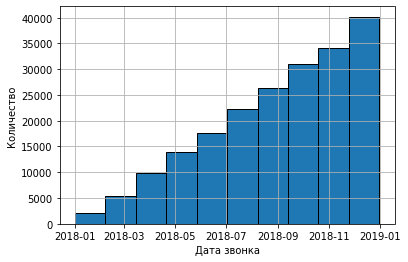

In [5]:
temp_column = 'call_date'
df_calls[temp_column] = pd.to_datetime(df_calls[temp_column], format='%Y-%m-%d')

describe_column(df_calls, temp_column)
custom_hist(df_calls[temp_column], 'Дата звонка')

Количество пропусков: 0
Тип переменной: float64
Максимальное значение 38.0
Минимальное значение 0.0


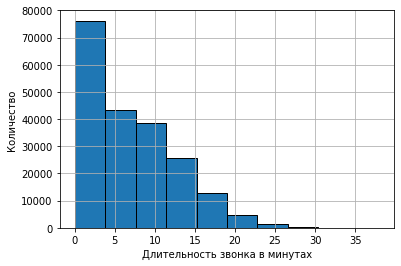

In [6]:
temp_column = 'duration'

describe_column(df_calls, temp_column)
custom_hist(df_calls[temp_column], 'Длительность звонка в минутах')

#### Смотрим содержание файла internet

In [7]:
df_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.0,74697.500000,43127.054745,0.0,37348.7500,74697.500,112046.2500,149395.00
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


,Unnamed: 0,id,mb_used,session_date,user_id
38264,38264,1134_319,335.26,2018-03-20,1134
71326,71326,1241_230,0.00,2018-05-13,1241
144085,144085,1481_439,399.68,2018-09-13,1481
85224,85224,1290_254,664.20,2018-06-10,1290
105607,105607,1357_34,323.81,2018-09-05,1357
99943,99943,1336_30,393.65,2018-12-31,1336
10291,10291,1035_126,399.94,2018-08-01,1035
84378,84378,1286_60,187.34,2018-12-13,1286
76221,76221,1255_417,611.90,2018-04-08,1255
86816,86816,1294_158,484.82,2018-07-27,1294


Количество дубликатов: 0


Меняем тип «call_date». Смотрим что получилось.

Количество пропусков: 0
Тип переменной: datetime64[ns]
Максимальное значение 2018-12-31 00:00:00
Минимальное значение 2018-01-01 00:00:00


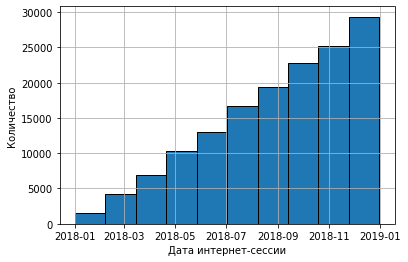

In [8]:
temp_column = 'session_date'
df_internet[temp_column] = pd.to_datetime(df_internet[temp_column], format='%Y-%m-%d')

describe_column(df_internet, temp_column)
custom_hist(df_internet[temp_column], 'Дата интернет-сессии')

Количество пропусков: 0
Тип переменной: float64
Максимальное значение 1724.83
Минимальное значение 0.0


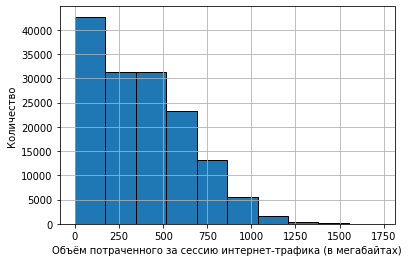

In [9]:
temp_column = 'mb_used'

describe_column(df_internet, temp_column)
custom_hist(df_internet[temp_column], 'Объём потраченного за сессию интернет-трафика (в мегабайтах)')

Количество пропусков: 0
Тип переменной: int64
Максимальное значение 149395
Минимальное значение 0


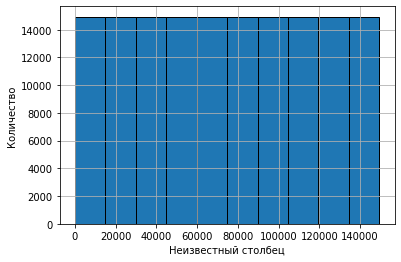

In [10]:
temp_column = 'Unnamed: 0'

describe_column(df_internet, temp_column)
custom_hist(df_internet[temp_column], 'Неизвестный столбец')

#### Смотрим содержание файла messages

In [11]:
df_info(df_messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


,id,message_date,user_id
65938,1282_370,2018-10-10,1282
4727,1019_31,2018-07-18,1019
31620,1142_139,2018-12-28,1142
58374,1257_166,2018-06-20,1257
33502,1146_300,2018-12-27,1146
96531,1396_182,2018-09-04,1396
100752,1412_54,2018-10-09,1412
3810,1015_75,2018-07-02,1015
22708,1094_156,2018-05-31,1094
53412,1237_21,2018-11-07,1237


Количество дубликатов: 0


Меняем тип «call_date». Смотрим что получилось.

Количество пропусков: 0
Тип переменной: datetime64[ns]
Максимальное значение 2018-12-31 00:00:00
Минимальное значение 2018-01-02 00:00:00


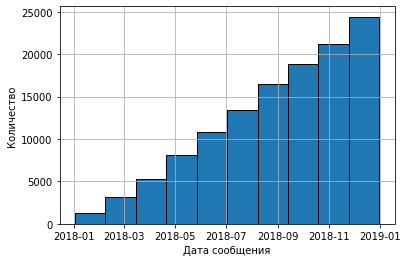

In [12]:
temp_column = 'message_date'
df_messages[temp_column] = pd.to_datetime(df_messages[temp_column], format='%Y-%m-%d')

describe_column(df_messages, temp_column)
custom_hist(df_messages[temp_column], 'Дата сообщения')

#### Смотрим содержание файла tariffs

In [13]:
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Смотрим содержание файла users

In [14]:
df_info(df_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
75,1075,25,NaN,Екатеринбург,Рафаэль,Никулин,2018-11-02,smart
332,1332,23,NaN,Москва,Джозефина,Тетерина,2018-05-28,smart
211,1211,62,NaN,Калуга,Арина,Азимова,2018-06-20,smart
130,1130,58,NaN,Тюмень,Инара,Крюкова,2018-04-01,smart
236,1236,30,NaN,Москва,Леон,Демидов,2018-12-22,smart
482,1482,68,NaN,Санкт-Петербург,Алина,Блохина,2018-02-28,smart
27,1027,62,NaN,Петрозаводск,Владислав,Авдеев,2018-04-10,smart
277,1277,30,NaN,Новосибирск,Валерия,Андреенко,2018-02-19,ultra
123,1123,74,NaN,Краснодар,Вениамин,Устинов,2018-03-18,smart
316,1316,42,NaN,Улан-Удэ,Аурелия,Алымова,2018-11-29,smart


Количество дубликатов: 0


Меняем тип «reg_date». Смотрим что получилось.

Количество пропусков: 0
Тип переменной: datetime64[ns]
Максимальное значение 2018-12-31 00:00:00
Минимальное значение 2018-01-01 00:00:00


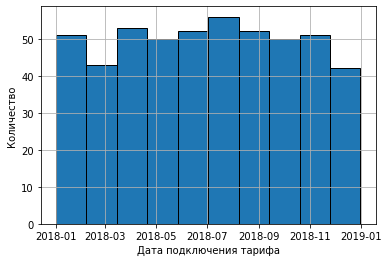

In [15]:
temp_column = 'reg_date'
df_users[temp_column] = pd.to_datetime(df_users[temp_column], format='%Y-%m-%d')

describe_column(df_users, temp_column)
custom_hist(df_users[temp_column], 'Дата подключения тарифа')

Меняем тип «churn_date». Смотрим что получилось.

In [16]:
temp_column = 'churn_date'
df_users[temp_column] = pd.to_datetime(df_users[temp_column], format='%Y-%m-%d')

describe_column(df_users, temp_column)
df_users.query('churn_date != "NaT"').head(5)

Количество пропусков: 462
Тип переменной: datetime64[ns]
Максимальное значение 2018-12-30 00:00:00
Минимальное значение 2018-08-17 00:00:00


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


Проверяем что в тарифах только 2 тарифа

In [17]:
df_users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

### Вывод.


Данные загружены и проверены. Там, где это было необходимо изменен тип данных.


## Считаем основные показатели по пользователям с детализацией по месяцам

### Подготовка данных

#### Готовим данные по звонкам

In [18]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month # Добавляем месяц числом
df_calls['duration_ceil'] = np.ceil(df_calls['duration']) # Округляем длительность звонка в большую сторону
# Делаем временную сводную таблицу
temp_df_calls = df_calls.pivot_table(index=['user_id','month'], values='duration_ceil', aggfunc=['count','sum']).reset_index()


#### Готовим данные по sms

In [19]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month # Добавляем месяц числом
# Делаем временную сводную таблицу
temp_df_messages = df_messages.pivot_table(index=['user_id','month'], values='id', aggfunc=['count']).reset_index()

#### Готовим данные по трафику

In [20]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month # Добавляем месяц числом
df_internet['mb_used_ceil'] = np.ceil(df_internet['mb_used']) # Округляем объём потраченного за сессию интернет-трафика
# Делаем временную сводную таблицу
temp_df_internet = df_internet.pivot_table(index=['user_id','month'], values='mb_used_ceil', aggfunc=['sum']).reset_index()

#### Объедениям все в одну таблицу

In [21]:
temp_df = temp_df_calls.merge(temp_df_messages, on=['user_id','month'], how='outer')
temp_df = temp_df.merge(temp_df_internet, on=['user_id','month'], how='outer')
temp_df = temp_df.fillna(0) # обнуляем NaN
temp_df = temp_df.merge(df_users[['user_id', 'tariff']], on='user_id', how='left')
df_tariffs = df_tariffs.rename (columns={'tariff_name': 'tariff'})
temp_df = temp_df.merge(df_tariffs, on='tariff', how='left')

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


### Считаем выручку с пользователя

In [22]:
temp_df.set_axis(['user_id','user_id_2','month','count_duration_ceil','sum_duration_ceil'
                  ,'count_sms','sum_mb_used_ceil','tariff','messages_included','mb_per_month_included'
                  ,'minutes_included','rub_monthly_fee','rub_per_gb','rub_per_message'
                  ,'rub_per_minute'],axis = 'columns',inplace = True)

def monthly_revenue(df: pd.DataFrame):
    m_t = 0
    m_t += df['rub_monthly_fee'] # Стоимость тарифного плана
    # Стоимость минут сверх тарифного плана
    m_t += ((abs(df['minutes_included'] - df['sum_duration_ceil']) 
           - (df['minutes_included'] - df['sum_duration_ceil']))/2) * df["rub_per_minute"]
    # Стоимость sms сверх тарифного плана
    m_t += ((abs(df['messages_included'] - df['count_sms']) 
           - (df['messages_included'] - df['count_sms']))/2) * df["rub_per_message"]
    # Стоимость трафика сверх тарифного плана
    m_t += np.ceil(((abs(df['mb_per_month_included'] - df['sum_mb_used_ceil']) 
           - (df['mb_per_month_included'] - df['sum_mb_used_ceil']))/2)/1024) * df["rub_per_gb"]
    return m_t
 
temp_df['monthly_revenue'] = temp_df.apply(monthly_revenue, axis=1)


### Выводим результат

In [23]:
# Убираем технические столбцы
temp_df = temp_df[['user_id','month','count_duration_ceil','sum_duration_ceil','count_sms','sum_mb_used_ceil','monthly_revenue','tariff' ]]
# Переименовываем столбцы
temp_df.set_axis(['Идентификатор пользователя','Месяц','Количество сделанных звонков (шт.)','Израсходовано минут разговора (мин.)','Количество отправленных сообщений (шт.)'
                  ,'Объем израсходованного трафика (Mb)','Помесячная выручка с пользователя (руб.)', 'tariff'],axis = 'columns',inplace = True)
# Выводим результат
temp_df.loc[:, 'Идентификатор пользователя': 'Помесячная выручка с пользователя (руб.)']

,Идентификатор пользователя,Месяц,Количество сделанных звонков (шт.),Израсходовано минут разговора (мин.),Количество отправленных сообщений (шт.),Объем израсходованного трафика (Mb),Помесячная выручка с пользователя (руб.)
0,1000,5,22.0,159.0,22.0,2256.0,1950.0
1,1000,6,43.0,172.0,60.0,23257.0,1950.0
2,1000,7,47.0,340.0,75.0,14016.0,1950.0
3,1000,8,52.0,408.0,81.0,14070.0,1950.0
4,1000,9,58.0,466.0,57.0,14581.0,1950.0
...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17232.0,950.0
3210,1489,10,0.0,0.0,21.0,19588.0,1550.0
3211,1489,11,0.0,0.0,20.0,17516.0,1150.0
3212,1489,12,0.0,0.0,35.0,17341.0,950.0


### Вывод.

Для каждого пользователя были вычислены:


•	количество сделанных звонков и израсходованных минут разговора по месяцам;

•	количество отправленных сообщений по месяцам;

•	объем израсходованного интернет-трафика по месяцам;

•	помесячная выручка.



## Анализ данных

Задаем функции для гистограмм

In [24]:
def custom_hist_2(temp_column: str):    
    (temp_df.query('tariff == "ultra"')  # Тариф ultra 
     [temp_column]).hist( bins = 80, label='Тариф ultra', alpha=.7, color='red', figsize=(14,8))
    (temp_df.query('tariff == "smart"')  # Тариф smart 
     [temp_column]).hist(bins = 80, label='Тариф smart', alpha=.7, color='yellow', figsize=(14,8)) 
    pl.title(temp_column)
    pl.xlabel(temp_column)
    pl.ylabel("Количество пользователей")
    pl.title('Данные за период с января по декабрь 2018 г.')
    plt.legend()
    plt.show()

### Анализируем продолжительность разговора.

Среднее количество минут разговора в месяц для тарифного плана «ultra» равно: 526.62
Среднее количество минут разговора в месяц для тарифного плана «smart» равно: 417.93
Дисперсия параметра «количество минут разговора в месяц» для тарифного плана «ultra» равна: 100771.22
Дисперсия параметра «количество минут разговора в месяц» для тарифного плана «smart» равна: 36203.07
Стандартное отклонение параметра «количество минут разговора в месяц» для тарифного плана «ultra» равно: 317.44
Стандартное отклонение параметра «количество минут разговора в месяц» для тарифного плана «smart» равно: 190.27


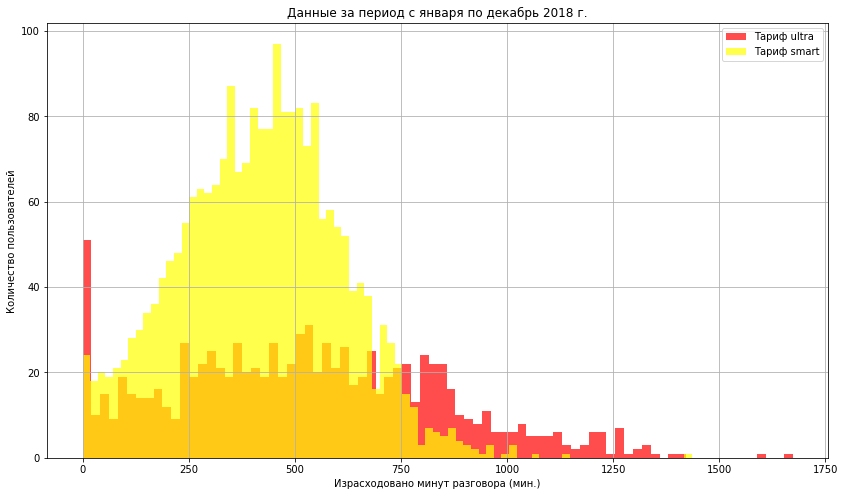

In [25]:
temp_column = 'Израсходовано минут разговора (мин.)'

print ('Среднее количество минут разговора в месяц для тарифного плана «ultra» равно:',
       (temp_df.query('tariff == "ultra"')[temp_column]).mean().round(2))
print ('Среднее количество минут разговора в месяц для тарифного плана «smart» равно:',
       (temp_df.query('tariff == "smart"')[temp_column]).mean().round(2))    
    
print ('Дисперсия параметра «количество минут разговора в месяц» для тарифного плана «ultra» равна:',
       np.var(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Дисперсия параметра «количество минут разговора в месяц» для тарифного плана «smart» равна:',
       np.var(temp_df.query('tariff == "smart"')[temp_column]).round(2))

print ('Стандартное отклонение параметра «количество минут разговора в месяц» для тарифного плана «ultra» равно:',
       np.std(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Стандартное отклонение параметра «количество минут разговора в месяц» для тарифного плана «smart» равно:',
       np.std(temp_df.query('tariff == "smart"')[temp_column]).round(2))

custom_hist_2(temp_column)

В среднем пользователи тарифа "ultra" разговаривают больше, но и разброс по длительности разговоров у пользователей тарифа "ultra" существенно выше.

### Анализируем количество отправленных сообщений.

Среднее количество отправленных сообщений в месяц для тарифного плана «ultra» равно: 49.36
Среднее количество отправленных сообщений в месяц для тарифного плана «smart» равно: 33.38
Дисперсия параметра «количество отправленных сообщений в месяц» для тарифного плана «ultra» равна: 2282.95
Дисперсия параметра «количество отправленных сообщений в месяц» для тарифного плана «smart» равна: 796.46
Стандартное отклонение параметра «количество отправленных сообщений в месяц» для тарифного плана «ultra» равно: 47.78
Стандартное отклонение параметра «количество отправленных сообщений в месяц» для тарифного плана «smart» равно: 28.22


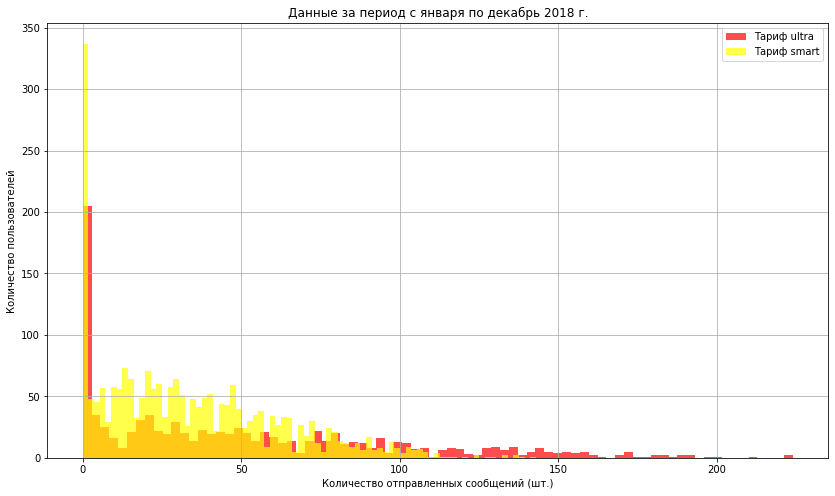

In [26]:
temp_column = 'Количество отправленных сообщений (шт.)'

print ('Среднее количество отправленных сообщений в месяц для тарифного плана «ultra» равно:',
       (temp_df.query('tariff == "ultra"')[temp_column]).mean().round(2))
print ('Среднее количество отправленных сообщений в месяц для тарифного плана «smart» равно:',
       (temp_df.query('tariff == "smart"')[temp_column]).mean().round(2))    
    
print ('Дисперсия параметра «количество отправленных сообщений в месяц» для тарифного плана «ultra» равна:',
       np.var(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Дисперсия параметра «количество отправленных сообщений в месяц» для тарифного плана «smart» равна:',
       np.var(temp_df.query('tariff == "smart"')[temp_column]).round(2))

print ('Стандартное отклонение параметра «количество отправленных сообщений в месяц» для тарифного плана «ultra» равно:',
       np.std(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Стандартное отклонение параметра «количество отправленных сообщений в месяц» для тарифного плана «smart» равно:',
       np.std(temp_df.query('tariff == "smart"')[temp_column]).round(2))

custom_hist_2(temp_column)

In [41]:
temp_df.groupby('tariff').agg({temp_column: ['mean', 'var', 'std']})

Количество отправленных сообщений (шт.)                        
                                          mean          var        std
tariff                                                                
smart                                33.384029   796.812958  28.227876
ultra                                49.363452  2285.266143  47.804457

В среднем пользователи тарифа "ultra" отправляют больше сообщений, но многие пользователи обоих тарифов вообще не пользуются sms.

### Анализируем объем израсходованного трафика.

In [ ]:
temp_column = 'Объем израсходованного трафика (Mb)'

print ('Средний объем израсходованного трафика в месяц для тарифного плана «ultra» равен:',
       (temp_df.query('tariff == "ultra"')[temp_column]).mean().round(2))
print ('Средний объем израсходованного трафика в месяц для тарифного плана «smart» равен:',
       (temp_df.query('tariff == "smart"')[temp_column]).mean().round(2))    
    
print ('Дисперсия параметра «Объем израсходованного трафика» для тарифного плана «ultra» равна:',
       np.var(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Дисперсия параметра «Объем израсходованного трафика» для тарифного плана «smart» равна:',
       np.var(temp_df.query('tariff == "smart"')[temp_column]).round(2))

print ('Стандартное отклонение параметра «Объем израсходованного трафика» для тарифного плана «ultra» равно:',
       np.std(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Стандартное отклонение параметра «Объем израсходованного трафика» для тарифного плана «smart» равно:',
       np.std(temp_df.query('tariff == "smart"')[temp_column]).round(2))

custom_hist_2(temp_column)


В среднем пользователи тарифа "ultra" используют больше трафика. У пользователей тарифа "smart" виден явный пик на значении 15 Gb, что обусловлено границей тарифного плана.

### Анализируем выручку с пользователя в месяц.

In [ ]:
temp_column = 'Помесячная выручка с пользователя (руб.)'

print ('Среднее значение выручки с пользователя в месяц для тарифного плана «ultra» равно:',
       (temp_df.query('tariff == "ultra"')[temp_column]).mean().round(2))
print ('Среднее значение выручки с пользователя в месяц для тарифного плана «smart» равно:',
       (temp_df.query('tariff == "smart"')[temp_column]).mean().round(2))    
    
print ('Дисперсия параметра «выручка с пользователя в месяц» для тарифного плана «ultra» равна:',
       np.var(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Дисперсия параметра «выручка с пользователя в месяц» для тарифного плана «smart» равна:',
       np.var(temp_df.query('tariff == "smart"')[temp_column]).round(2))

print ('Стандартное отклонение параметра «выручка с пользователя в месяц» для тарифного плана «ultra» равно:',
       np.std(temp_df.query('tariff == "ultra"')[temp_column]).round(2))
print ('Стандартное отклонение параметра «выручка с пользователя в месяц» для тарифного плана «smart» равно:',
       np.std(temp_df.query('tariff == "smart"')[temp_column]).round(2))

custom_hist_2(temp_column)

В среднем выручка с пользователя тарифа "ultra" выше, но практически не выходит за границы ежемесячной абонентской платы. Пользователей тарифа "smart" напротив, активно пользуются услугами, выходящими за рамки лимитов тарифного плана.

### Вывод.

Поведение пользователей тарифов "smart" и "ultra" существенно различается:


•	В среднем пользователи тарифа "ultra" разговаривают больше, но и разброс по длительности разговоров у пользователей тарифа "ultra" существенно выше;

•	В среднем пользователи тарифа "ultra" отправляют больше сообщений, но многие пользователи обоих тарифов вообще не пользуются sms;

•	В среднем пользователи тарифа "ultra" используют больше трафика. У пользователей тарифа "smart" виден явный пик на значении 15 Gb, что обусловлено границей тарифного плана;

•	В среднем выручка с пользователя тарифа "ultra" выше, но практически не выходит за границы ежемесячной абонентской платы.


## Проверка гипотез

### Формулируем первую гипотезу:

H₀: средние выручки пользователей тарифов «Ультра» и «Смарт» равны;

H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Были выбраны такие формулировки гипотез так как нулевая гипотеза всегда формулируется исходя из равенства.


In [ ]:
temp_column = 'Помесячная выручка с пользователя (руб.)'
alpha =0.05
alpha_2 =0.0001

print ('Среднее значение выручки с пользователя в месяц для тарифного плана «ultra» равно:',
       (temp_df.query('tariff == "ultra"')[temp_column]).mean().round(2))
print ('Среднее значение выручки с пользователя в месяц для тарифного плана «smart» равно:',
       (temp_df.query('tariff == "smart"')[temp_column]).mean().round(2))  


results = st.ttest_ind(
    (temp_df.query('tariff == "ultra"')[temp_column]), 
    (temp_df.query('tariff == "smart"')[temp_column]))


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу при alpha = 5%")
else:
    print("Не получилось отвергнуть нулевую гипотезу при alpha = 5%")

if results.pvalue < alpha_2:
    print("Отвергаем нулевую гипотезу при alpha = 0.01%")
else:
    print("Не получилось отвергнуть нулевую гипотезу при alpha = 0.01%")

Даже при alpha = 0.01% нулевая гипотеза отвергается. То есть средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Формулируем вторую гипотезу:

H₀: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов;

H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Были выбраны такие формулировки гипотез так как нулевая гипотеза всегда формулируется исходя из равенства.


In [ ]:
temp_column = 'Помесячная выручка с пользователя (руб.)'
alpha =0.05
alpha_2 =0.1

# Готовим базу для анализа по городам
temp_df = temp_df.rename (columns={'Идентификатор пользователя': 'user_id'})
temp_df = temp_df.merge(df_users[['user_id', 'city']], on='user_id', how='left')

print ('Среднее значение выручки с пользователя в месяц для Москвы равно:',
       (temp_df.query('city == "Москва"')[temp_column]).mean().round(2))
print ('Среднее значение выручки с пользователя в месяц для других регионов равно:',
       (temp_df.query('city != "Москва"')[temp_column]).mean().round(2))  


results = st.ttest_ind(
    (temp_df.query('city == "Москва"')[temp_column]), 
    (temp_df.query('city != "Москва"')[temp_column]))


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу при alpha = 5%")
else:
    print("Не получилось отвергнуть нулевую гипотезу при alpha = 5%")

if results.pvalue < alpha_2:
    print("Отвергаем нулевую гипотезу при alpha = 10%")
else:
    print("Не получилось отвергнуть нулевую гипотезу при alpha = 10%")

Если p-value больше 10%, то нулевую гипотезу точно не нужно отвергать. Исходя из этого мы не можем отвергнуть гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

### Вывод.

В результате проверки гипотез были сделаны следующие выводы:


•	средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	мы не можем отвергнуть гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.


## Общий вывод

Проведя данное исследование, мы пришли к выводу, что: 


•	В среднем пользователи тарифа "ultra" разговаривают больше, но и разброс по длительности разговоров у пользователей тарифа "ultra" существенно выше;

•	В среднем пользователи тарифа "ultra" отправляют больше сообщений, но многие пользователи обоих тарифов вообще не пользуются sms;

•	В среднем пользователи тарифа "ultra" используют больше трафика. У пользователей тарифа "smart" виден явный пик на значении 15 Gb, что обусловлено границей тарифного плана;

•	В среднем выручка с пользователя тарифа "ultra" выше, но практически не выходит за границы ежемесячной абонентской платы;

•	Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

•	Мы не можем отвергнуть гипотезу о том, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.


Опираясь на вышесказанное можно заключить что пользователи тарифа "ultra" приносят больше выручки, и если этот критерий является определяющим, то при выборе какой тариф продвигать "smart" или "ultra" целесообразно предпочесть последний. Рассматривая вопрос о том какая компания продвижения тарифа более рациональна, региональная или направленная на жителей Москвы нужно руководствоваться в основном тем, сколько стоит привлечение одного клиента в Москве и регионах, и отдать предпочтение наиболее рациональному с точки зрения затрат варианту, так как мы не можем отвергнуть гипотезу о том, что средняя выручка, получаемая от пользователей из Москвы равна выручке пользователей из других регионов.
